# NETFLIX THROUGH THE PANDEMIC 

In [3]:
# Import dependencies

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

In [4]:
# Import the stock and COVID data

stock_raw = pd.read_csv(r'C:\Users\ericj\Desktop\Netflix through the Pandemic\project1/NFLX - COVID.csv', 
                        encoding = 'utf-8')

cases_raw = pd.read_csv(r'C:\Users\ericj\Desktop\Netflix through the Pandemic\project1/cases_shortened.csv',
                       encoding = 'utf-8')

# Netflix Stock Price vs. Number of Newly Confirmed Cases

The first analysis involves directly plotting Netflix stock prices and the corresponding days' number of newly confirmed cases and finding the correlation between the two.

In [5]:
print(stock_raw.head())
print(cases_raw.head())

         Date        Open        High         Low       Close   Adj Close  \
0  2019-01-02  259.279999  269.750000  256.579987  267.660004  267.660004   
1  2019-01-03  270.200012  275.790009  264.429993  271.200012  271.200012   
2  2019-01-04  281.880005  297.799988  278.540009  297.570007  297.570007   
3  2019-01-07  302.100006  316.799988  301.649994  315.339996  315.339996   
4  2019-01-08  319.980011  320.589996  308.010010  320.269989  320.269989   

     Volume  
0  11679500  
1  14969600  
2  19330100  
3  18620100  
4  15359200  
  Entity      Code         Day  Daily new confirmed cases of COVID-19  \
0  World  OWID_WRL  2020-01-22                                      0   
1  World  OWID_WRL  2020-01-23                                    100   
2  World  OWID_WRL  2020-01-24                                    287   
3  World  OWID_WRL  2020-01-25                                    493   
4  World  OWID_WRL  2020-01-26                                    683   

   Daily new c

In [6]:
# Clean up the data

stock_raw = stock_raw.rename(columns = {'Close':'Netflix Closing Price'})
stock_close = stock_raw[['Date','Netflix Closing Price']]
cases_raw = cases_raw.rename(columns={'Day' : 'Date', 'Daily new confirmed cases of COVID-19':'Daily New Cases of COVID-19'})
cases_by_date = cases_raw[['Date', 'Daily New Cases of COVID-19']]
stock_cases = pd.merge(stock_close, cases_by_date, how = 'right')
stock_cases_clean = stock_cases.dropna()
stock_cases_cleaned = stock_cases_clean.reset_index(drop = True)
stock_cases_cleaned

,Date,Netflix Closing Price,Daily New Cases of COVID-19
0,2020-01-22,326.000000,0
1,2020-01-23,349.600006,100
2,2020-01-24,353.160004,287
3,2020-01-27,342.880005,809
4,2020-01-28,348.519989,2651
...,...,...,...
593,2022-05-27,195.190002,568074
594,2022-05-31,197.440002,618580
595,2022-06-01,192.910004,692064
596,2022-06-02,205.089996,524610


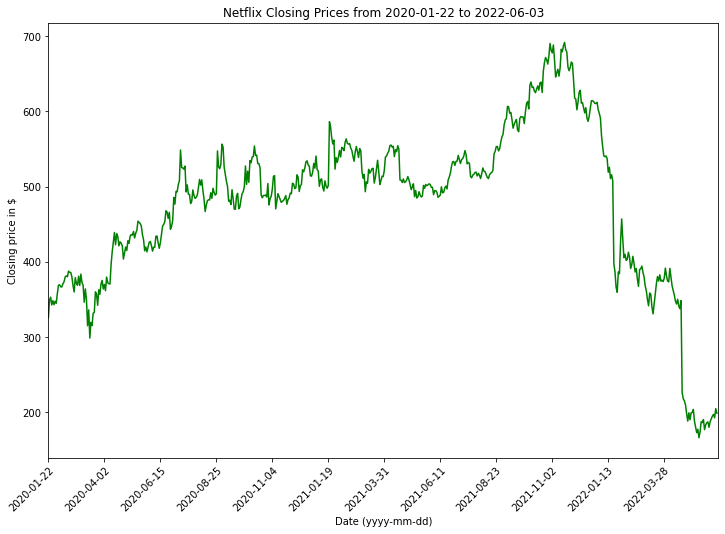

In [7]:
# Plot Netflix Price Movement

plt.figure(figsize=(12,8))
plt.plot(stock_cases_cleaned['Date'], stock_cases_cleaned['Netflix Closing Price'], color = 'green')
plt.xticks(np.arange(0, 598, 50), rotation = 45, rotation_mode = 'anchor', ha = 'right')
plt.xlim(0, 598)
plt.xlabel('Date (yyyy-mm-dd)')
plt.ylabel('Closing price in $')
plt.title('Netflix Closing Prices from 2020-01-22 to 2022-06-03')
plt.show()

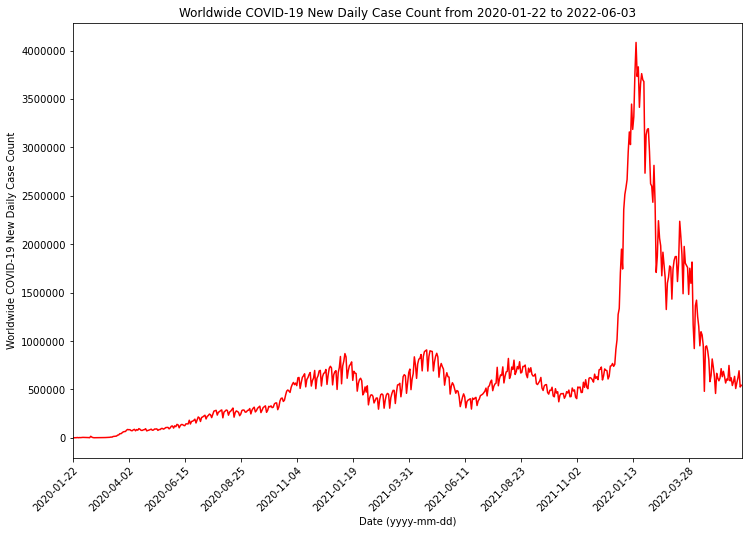

In [8]:
# Plot the Number of Daily New COVID-19 Cases

plt.figure(figsize=(12,8))
plt.ticklabel_format(style='plain')
plt.plot(stock_cases_cleaned['Date'], stock_cases_cleaned['Daily New Cases of COVID-19'], color = 'red')
plt.xticks(np.arange(0, 598, 50), rotation = 45, rotation_mode = 'anchor', ha = 'right')
plt.xlim(0, 598)
plt.xlabel('Date (yyyy-mm-dd)')
plt.ylabel('Worldwide COVID-19 New Daily Case Count')
plt.title('Worldwide COVID-19 New Daily Case Count from 2020-01-22 to 2022-06-03')
plt.show()

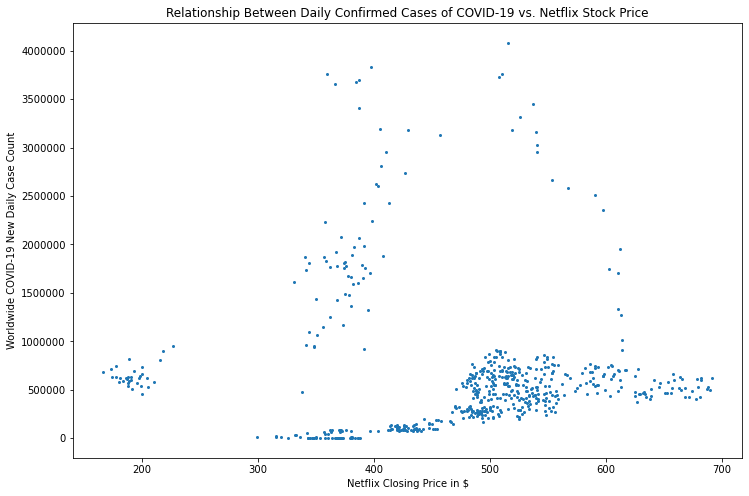

In [9]:
# Plot the Relationship between Daily Confirmed Cases vs. Netflix Closing Price

scatter_data = stock_cases.set_index('Date')
plt.figure(figsize=(12,8))
plt.ticklabel_format(style='plain')
plt.scatter(scatter_data['Netflix Closing Price'], scatter_data['Daily New Cases of COVID-19'], s = 4)
plt.xlabel('Netflix Closing Price in $')
plt.ylabel('Worldwide COVID-19 New Daily Case Count')
plt.title('Relationship Between Daily Confirmed Cases of COVID-19 vs. Netflix Stock Price')
plt.show()

In [10]:
# Correlation Between New Daily Case Count and Netflix Closing Price

correlation = st.pearsonr(stock_cases_cleaned['Netflix Closing Price'], 
                          stock_cases_cleaned['Daily New Cases of COVID-19'])
print(correlation)

(-0.03850079782839012, 0.34727984732763245)


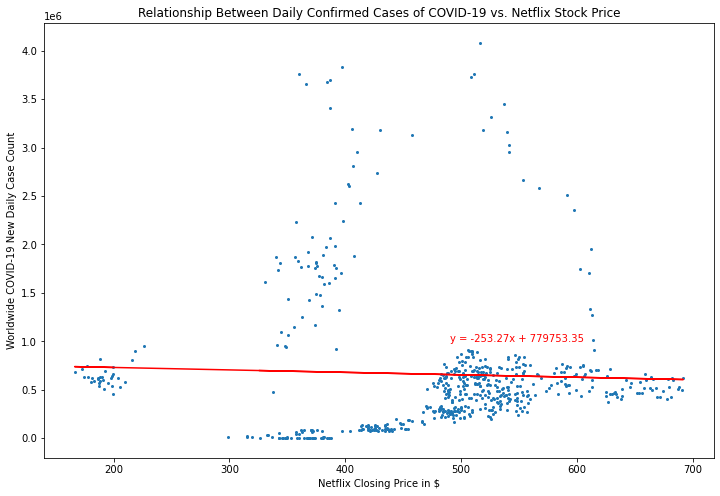

In [11]:
# Linear Regression to Further Depict the Relationship

x = stock_cases_cleaned['Netflix Closing Price']
y = stock_cases_cleaned['Daily New Cases of COVID-19']
(slope, intercept, r, p, std_err) = st.linregress(x, y)
regress_val = slope * x + intercept
line = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.figure(figsize=(12,8))
plt.scatter(stock_cases_cleaned['Netflix Closing Price'], stock_cases_cleaned['Daily New Cases of COVID-19'], s = 4)
plt.plot(x, regress_val, '-r')
plt.annotate(line, (490,1000000), fontsize = 10, color="red")
plt.xlabel('Netflix Closing Price in $')
plt.ylabel('Worldwide COVID-19 New Daily Case Count')
plt.title('Relationship Between Daily Confirmed Cases of COVID-19 vs. Netflix Stock Price')
plt.show()

There is a weak negative correlation between the worldwide daily new confirmed cases of COVID-19 and the corresponding days' Netflix's stock price as indicated by the correlation coefficient of -0.04.
The P-value of 0.35 suggests that there is no significant relationship between the two variables. Therefore, further analyses are required to see if there is any relationship between the pandemic and the stock price.

# Netflix Stock Prices a Week After the Daily Case Count

The second analysis explores the effect of COVID-19 on the stock price a week after the release of the case count.

In [12]:
# Merge, Create, Rename, and Clean a New Dataset

stock_cases_cleaned.head()
stock_cases_cleaned['Date'] = pd.to_datetime(stock_cases_cleaned['Date'])
stock_cases_cleaned  = stock_cases_cleaned.loc[stock_cases_cleaned['Date'] >= '2020-01-29']
date_modified = stock_cases_cleaned.rename(columns = {'Date': 'Date of Netflix Stock Pricing'})
date_modified['Date of Case Reporting'] = date_modified['Date of Netflix Stock Pricing'] - pd.Timedelta(days=7)
date_modified = date_modified[['Date of Netflix Stock Pricing', 'Netflix Closing Price', 
                              'Date of Case Reporting', 'Daily New Cases of COVID-19']]
temp = cases_raw.rename(columns = {'Date':'Date of Case Reporting', 'Daily New Cases of COVID-19' : 'Temp Col'})
temp['Date of Case Reporting'] = pd.to_datetime(temp['Date of Case Reporting'])
temp_merge = pd.merge(date_modified, temp, how = 'left')
new_merge = temp_merge[['Date of Netflix Stock Pricing', 'Netflix Closing Price', 'Date of Case Reporting', 'Temp Col']]
new_dataframe = new_merge.rename(columns = {'Temp Col' : 'Daily New Cases of COVID-19'})
new_dataframe

,Date of Netflix Stock Pricing,Netflix Closing Price,Date of Case Reporting,Daily New Cases of COVID-19
0,2020-01-29,343.160004,2020-01-22,0
1,2020-01-30,347.739990,2020-01-23,100
2,2020-01-31,345.089996,2020-01-24,287
3,2020-02-03,358.000000,2020-01-27,809
4,2020-02-04,369.010010,2020-01-28,2651
...,...,...,...,...
588,2022-05-27,195.190002,2022-05-20,619377
589,2022-05-31,197.440002,2022-05-24,579303
590,2022-06-01,192.910004,2022-05-25,634293
591,2022-06-02,205.089996,2022-05-26,508886


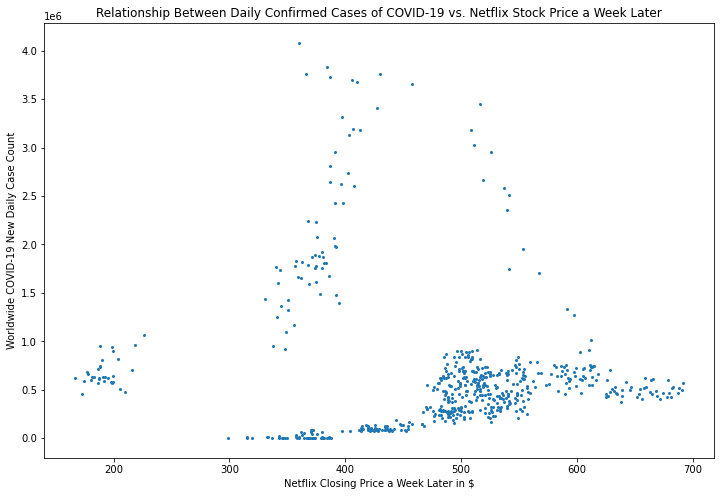

In [13]:
# Plot the Relationship between Daily Confirmed Cases vs. Netflix Closing Price a Week Later

plt.figure(figsize=(12,8))
plt.scatter(new_dataframe['Netflix Closing Price'], new_dataframe['Daily New Cases of COVID-19'], s = 4)
plt.xlabel('Netflix Closing Price a Week Later in $')
plt.ylabel('Worldwide COVID-19 New Daily Case Count')
plt.title('Relationship Between Daily Confirmed Cases of COVID-19 vs. Netflix Stock Price a Week Later')
plt.show()

In [14]:
# Correlation Between New Daily Case Count and Netflix Closing Price a Week Later

correlation = st.pearsonr(new_dataframe['Netflix Closing Price'], 
                          new_dataframe['Daily New Cases of COVID-19'])
print(correlation)

(-0.11280172491525356, 0.005961580278216857)


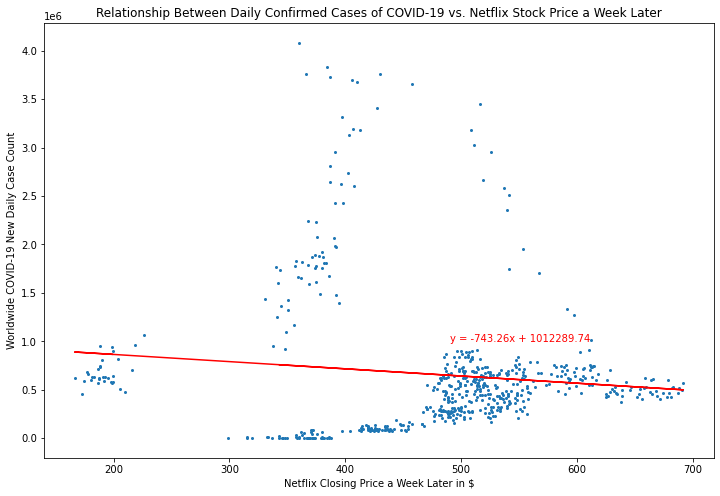

In [15]:
# Linear Regression to Further Depict the Relationship

x = new_dataframe['Netflix Closing Price']
y = new_dataframe['Daily New Cases of COVID-19']
(slope, intercept, r, p, std_err) = st.linregress(x, y)
regress_val = slope * x + intercept
line = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.figure(figsize=(12,8))
plt.scatter(new_dataframe['Netflix Closing Price'], new_dataframe['Daily New Cases of COVID-19'], s = 4)
plt.plot(x, regress_val, '-r')
plt.annotate(line, (490,1000000), fontsize = 10, color="red")
plt.xlabel('Netflix Closing Price a Week Later in $')
plt.ylabel('Worldwide COVID-19 New Daily Case Count')
plt.title('Relationship Between Daily Confirmed Cases of COVID-19 vs. Netflix Stock Price a Week Later')
plt.show()

There is a weak negative correlation between the worldwide daily new confirmed cases of COVID-19 and the Netflix's stock price a week later as indicated by the correlation coefficient of -0.11.
The P-value of 0.005 suggests that there is a significant relationship between the two variables. Further research will follow to explore other independent variables.